# Exploring venues in Banglore, India

## Table of Contents

1. Introduction
2. Data Collection from APIs
1. Data Cleaning
2. Methodolgy
3. Analysis
4. Results and Discussion
5. Conclusion


## Introduction 
The aim of the project is to identify venues in Banglore, India based on their rating and average prices. In this notebook, we will identify various venues in the city of Banglore, India, using Foursquare API and Zomato API, to help visitors select the restaurants that suit them the best.

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.

Here, we'll identify places that are fit for various individuals based on the information collected from the two APIs and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.
Data Collection from APIs 
To begin with, we will take a look at Banglore on the Map using the folium library.

We will also fetch the data from two different APIs.

## Foursquare API:
We will use the Foursquare API to fetch venues in Banglore starting from the middle upto 44 Kilometers in each direction.
Zomato API: The Zomato API provides information about various venues including the complete address, user ratings, price for two people, price range and a lot more.
## Banglore
Banglore is composed of a number of sectors spread across a total area of 114 sq Km. There are many venues (especially restaurants, hotels and cafes) which can be explored.

We can use the geopy library to extract the latitude and longitude values of Banglore but it seems off and thus, we'll directly supply the values in this case.

In [1]:
!pip install numpy --upgrade
!pip install pandas --upgrade
BLR_LATITUDE = '12.9716'
BLR_LONGITUDE = '77.5946'
print('The geograpical coordinates of Bangloe are {}, {}.'.format(BLR_LATITUDE, BLR_LONGITUDE))

     |████████████████████████████████| 20.2MB 9.7MB/s eta 0:00:01
ERROR: tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
     |████████████████████████████████| 10.1MB 8.3MB/s eta 0:00:01    |█████████████████▍              | 5.5MB 8.3MB/s eta 0:00:01
  Found existing installation: pandas 0.24.1
    Uninstalling pandas-0.24.1:
      Successfully uninstalled pandas-0.24.1
The geograpical coordinates of Bangloe are 12.9716, 77.5946.


Let's use the folium library to create a complete map zoomed on Banglore.
We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering.

In [3]:
!pip install folium
import folium

banglore_map = folium.Map(location = [BLR_LATITUDE, BLR_LONGITUDE], zoom_start = 13)
folium.Marker([BLR_LATITUDE, BLR_LONGITUDE]).add_to(banglore_map)
banglore_map

     |████████████████████████████████| 102kB 7.6MB/s ta 0:00:011


In [4]:
FOURSQUARE_CLIENT_ID='0Z4PTYUUQOL4W120YGRWNUNS3YXFJPEK1RLANMIXY4QW5VVV'
FOURSQUARE_CLIENT_SECRET='NPLKSXOJQFPA2PS20ZAGSK3NHFD23D1T1SZQNKSMZBA3H5QD'
RADIUS = 4000 # 1 Km
NO_OF_VENUES = 100
VERSION = '20200601' # Current date

# Foursqare API , to get the venuews of Banglore

Now lets use foursquare api

The geograpical coordinates of Bangalore are 12.9716, 77.5946.


And lets populate the foursquare venues

In [5]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [6]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        BLR_LATITUDE, 
                                                                        BLR_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))
    
  

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    
    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))
print ("\nfoursquare_venues\n  {}".format(foursquare_venues))

Total 100 venues fetched within a total radius of 4.0 Km


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:37: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total 100 venues fetched within a total radius of 4.0 Km
Total 34 venues fetched within a total radius of 4.0 Km

Total 234 venues fetched

foursquare_venues
                                             name  \
0                   JW Marriott Hotel Bengaluru   
1                                       UB City   
2                                       Toscano   
3                              Smoke House Deli   
4                                         Shiro   
5                                     Café Noir   
6                                         Skyye   
7                                 Spice Terrace   
8                   Bliss Luxe Chocolate Lounge   
9                                        Harima   
10                       Truffles - Ice & Spice   
11                                 Corner House   
12                                  Cubbon Park   
13                                  J W Kitchen   
14                                 ITC Gardenia   
15                   Goo


# Zomato API
The Zomato API allows using its search API to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the name, lat, and lng values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue.

The query will be the name of the venue.
The start defines from what offset we want to start, so we'll keep it at 0.
The count defines the number of restaurants we want to fetch. As we have the exact location coordinates, we'll fetch only one.
We will supply the latitude and longitude values.
We will set the sorting criteria as real_distance so each time we get the venue we're searching based on location coordinates

In [8]:

headers = {'user-key': 'd097b772477879ba9f8d486862a2cef0'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    #print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])
zomato_venues

,venue,latitude,longitude,price_for_two,price_range,rating,address
0,Merak-JW Marriott Hotel,12.9723820000,77.5950510000,1200.0,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle..."
1,Shiro,12.9717578595,77.5959215686,3000.0,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L..."
2,Toscano,12.9718728650,77.5963661447,2400.0,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell..."
3,Smoke House Deli,12.9716585366,77.5983177871,1600.0,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore"
4,Shiro,12.9717578595,77.5959215686,3000.0,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L..."
5,Cafe Noir,12.9721260729,77.5964409113,1500.0,3.0,4.3,"2nd Floor, UB City, Vittal Mallya Road, Lavell..."
6,Skyye,12.9716320722,77.5963708386,2500.0,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya..."
7,Spice Terrace - JW Marriott,12.9717516518,77.5951762497,3000.0,4.0,4.4,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle..."
8,Skyye,12.9716320722,77.5963708386,2500.0,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya..."
9,Harima,12.9675362725,77.5999006256,2000.0,4.0,4.4,"131, 4th Floor, Devatha Plaza, Residency Road,..."


## Lets plot a map for Foursquare venues

In [9]:
banglore_map = folium.Map(location = [BLR_LATITUDE, BLR_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(banglore_map)  


banglore_map

In [ ]:
## Now lets plot a map for Zomato venues

In [10]:
banglore_map = folium.Map(location = [BLR_LATITUDE, BLR_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(banglore_map)  


banglore_map

To combine the two datasets, I'll have to check that the latitude and longitude values of each corresponding venue match. Thus, I'll round both the latitude and longitude values upto 4 decimal places. Then, I'll calculate the difference between the corresponding latitude and longitude values and see if the difference is less than 0.0004 which should ideally mean that the two locations are same.

In [39]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [40]:

dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [41]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])
selected_venues

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0
1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0
2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0
3,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0
4,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0
5,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.3,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",750.0
6,Lounge,Skyye,12.9716,77.5964,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya...",1250.0
7,Cupcake Shop,Skyye,12.9716,77.5964,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya...",1250.0
8,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.4,"131, 4th Floor, Devatha Plaza, Residency Road,...",1000.0
9,Burger Joint,Mainland China,12.9715,77.6009,3.0,4.1,"15/16, Ground Floor, House of Lords, St. Marks...",850.0


I'll now select the venue name from Zomato API. I'll also get the average price per person by dividing the column price_for_two by 2 and removing this column from the dataset along with other unnecessary columns.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Now lets check the selected venues

In [42]:
selected_venues.head(20)

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0
1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0
2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0
3,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0
4,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0
5,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.3,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",750.0
6,Lounge,Skyye,12.9716,77.5964,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya...",1250.0
7,Cupcake Shop,Skyye,12.9716,77.5964,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya...",1250.0
8,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.4,"131, 4th Floor, Devatha Plaza, Residency Road,...",1000.0
9,Burger Joint,Mainland China,12.9715,77.6009,3.0,4.1,"15/16, Ground Floor, House of Lords, St. Marks...",850.0


In [16]:

selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 140


# Methodology ¶
This project aims at identifying the venues in Chandigarh based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.

As a first step, we retrieved the data from two APIs (Foursquare and Zomato). We extract venue information from the center of Chandigarh, upto a distance of 4 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.

Secondly, we then explored the data retrieved from the two APIs on the map and identified the top category types. The data from the two sources is carefully combined based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.

Next, we'll analyse the data that we created based on the ratings and price of each venue. We'll identify places where many venues are located so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore areas that are high rated and those that are low rated while also plotting the map of high and low priced venues. Lastly, we'll cluster the venues based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.

Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.

# Analysis 
The complete dataset is now in its final form.

We will inspect these venues based on their rating. The rating of a venue are based on user reviews and belongs to a range from 1 to 5. We'll also analyse the venues based on their price per person as well as the price range.

# Categories
We have various types of venues in the final dataset. We will take a look at the venues and check which are the majority venue categories in the list.

<BarContainer object of 57 artists>

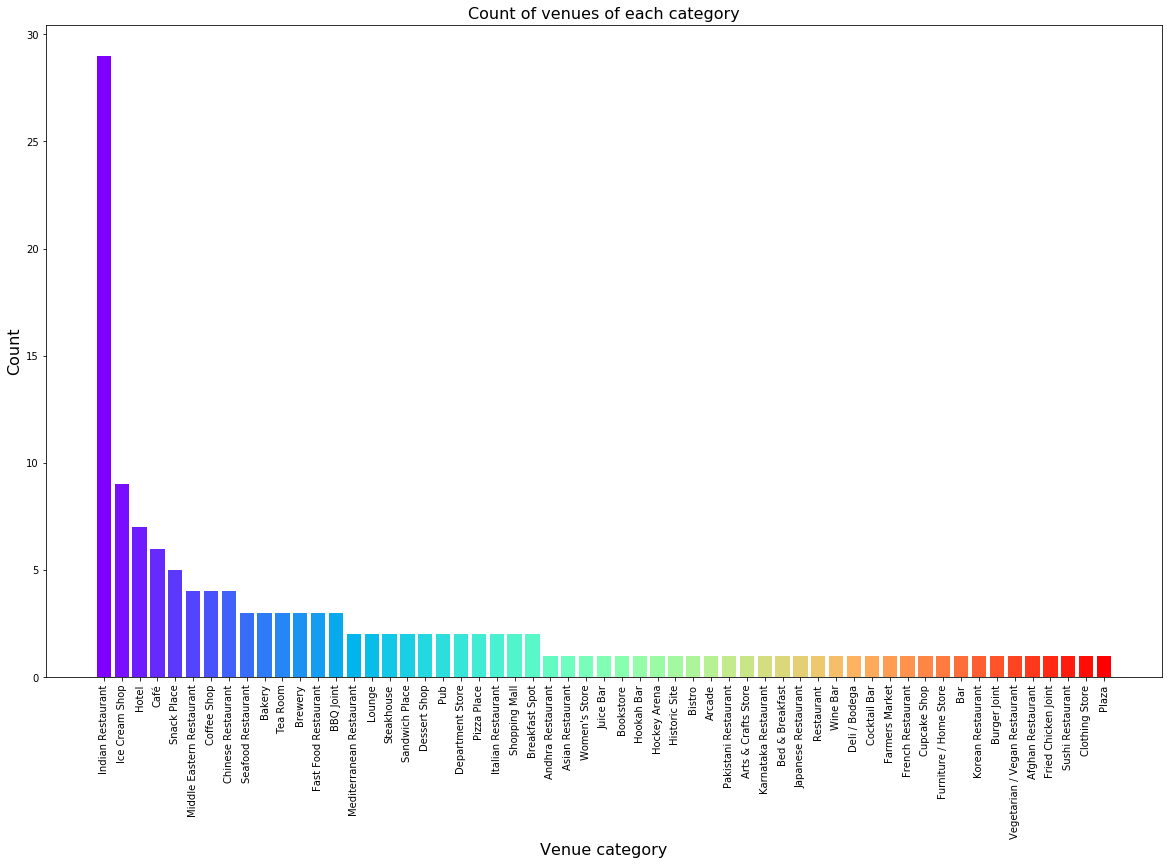

In [17]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

As we can see the majority venues are Hotel and Indian Restaurant. So, if as a tourist, you're looking for Hotel and Indian restaurants, you're in luck.

Rating
Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place. To cater to this, we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Count of venues with given rating')

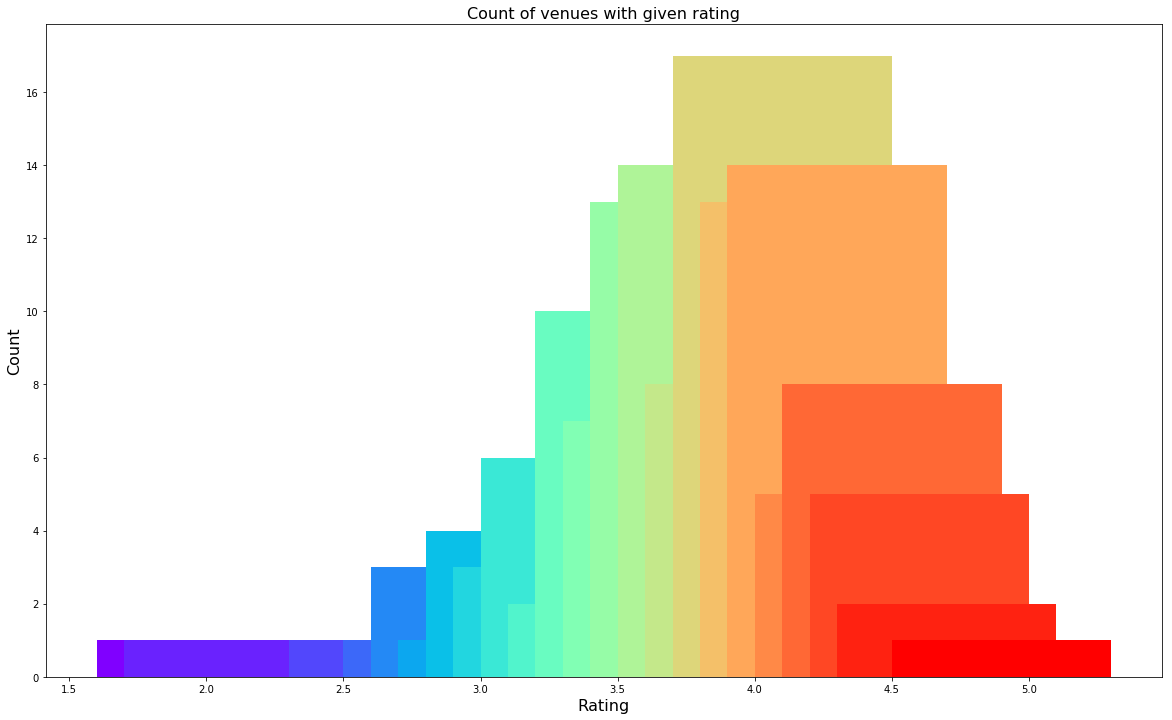

In [18]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that majority venues have their rating close to 4.

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:

1 to 2
2 to 3
3 to 4
4 to 5

In [19]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [20]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

banglore_map = folium.Map(location = [BLR_LATITUDE, BLR_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(banglore_map)  


banglore_map

The map has the location of all the venues. If someone wants to explore new venues, they should definitely check out  

Price
We will now take a look the venues based on the price values. We have two price features for our venues, one is average_price which defines the average cost for one person and the other is price_range which determines the price range as defined by Zomato.

We will first explore the average_price using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.

Text(0.5, 1.0, 'Count of venues with given average price')

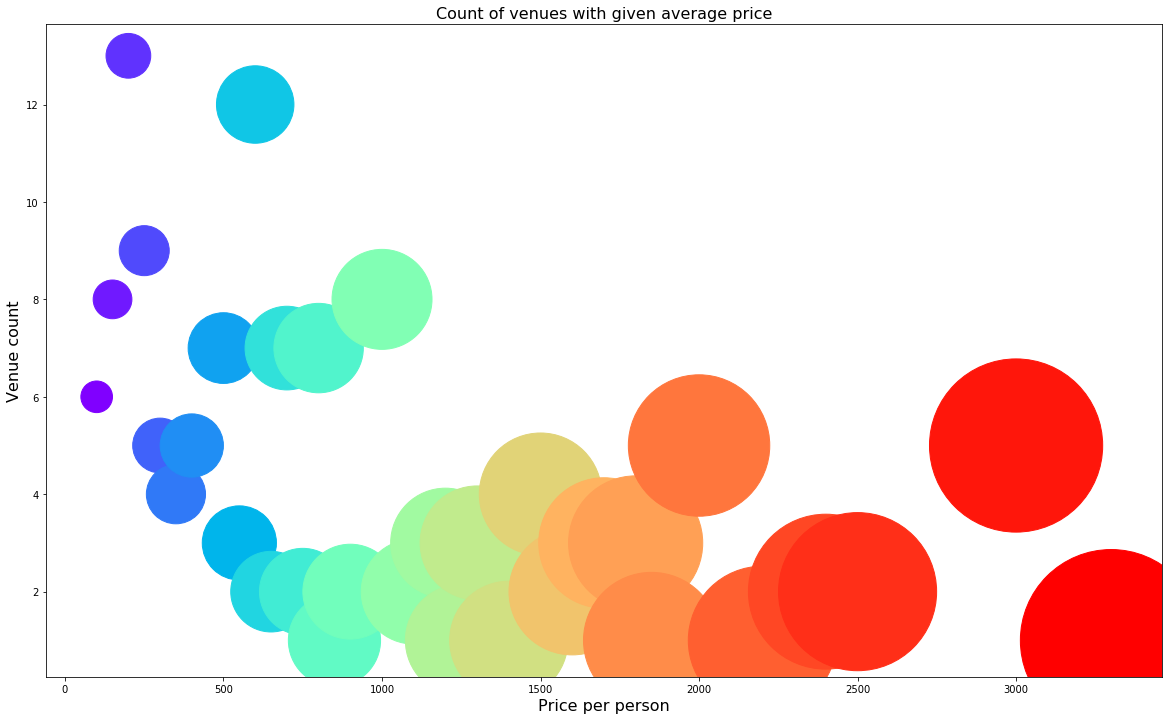

In [22]:

average_prices = selected_venues['price_for_two'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

# Clustering
We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into two separate groups.

In [27]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 4

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,2,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",Good,600.0
1,1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",Very good,1500.0
2,1,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",Very good,1200.0
3,3,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",Very good,800.0
4,1,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",Very good,1500.0


In [28]:
banglore_map = folium.Map(location = [BLR_LATITUDE, BLR_LONGITUDE], zoom_start = 13)
color_map = { 0: 'green', 1: 'red', 2: 'blue', 3: 'pink'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(banglore_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(banglore_map)


banglore_map

In [29]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,0,Ice Cream Shop,Corner House Ice Cream,12.9732,77.6000,1.0,4.3,"4, Madras Bank Road, Lavelle Road, Bangalore",Very good,175.0
1,0,Fried Chicken Joint,Kentacky Chicken Corner,12.9662,77.5951,1.0,4.1,"10, Sampangi Tank Road, Richmond Road, Bangalore",Very good,150.0
2,0,Plaza,Lakeview Milkbar,12.9760,77.6038,2.0,3.9,"89, Kannan Building, MG Road, Bangalore",Good,250.0
3,0,Brewery,RS Shiv Sagar Express,12.9685,77.6017,1.0,3.6,"Near Cash Pharmacy, Residency Road, Bangalore",Good,150.0
4,0,Seafood Restaurant,Fishland,12.9754,77.5785,2.0,4.2,"Sujatha Complex, 1st Main, Gandhinagar, Majest...",Very good,250.0
5,0,Indian Restaurant,Khazana Food Paradise,12.9643,77.6055,1.0,4.2,"16, Aga Abdulla Street, Richmond Road Area, Be...",Very good,200.0
6,0,Ice Cream Shop,Corner House Ice Cream,12.9881,77.5772,1.0,4.5,"29/2, Nagappa Street, Nehrunagar Circle, Sesha...",Very good,175.0
7,0,Hockey Arena,Domino's Pizza,12.9621,77.6015,1.0,3.6,"2/13, Ground Floor, Rehinus Street, Opposite H...",Good,200.0
8,0,Ice Cream Shop,Art of Delight,12.9730,77.6092,1.0,4.5,"44/1, Residency Road, Bangalore",Very good,200.0
9,0,Indian Restaurant,Mavalli Tiffin Room (MTR),12.9552,77.5856,1.0,4.6,"14, Lalbagh Road, Mavalli, Basavanagudi, Banga...",Very good,125.0


In [30]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 1.12 and rating spread around 3.91


In [31]:

result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",Very good,1500.0
1,1,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",Very good,1200.0
2,1,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.2,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",Very good,1500.0
3,1,Lounge,Skyye,12.9716,77.5964,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya...",Very good,1250.0
4,1,Cupcake Shop,Skyye,12.9716,77.5964,4.0,4.4,"Uber Level, 16th Floor, UB City, Vittal Mallya...",Very good,1250.0
5,1,Arcade,Lotus Pavilion - ITC Gardenia,12.9668,77.5958,4.0,4.1,"ITC Gardenia, 1, Richmond Road, Bangalore",Very good,1500.0
6,1,Wine Bar,Lotus Pavilion - ITC Gardenia,12.9668,77.5958,4.0,4.1,"ITC Gardenia, 1, Richmond Road, Bangalore",Very good,1500.0
7,1,Hotel,Lapis - The Oberoi,12.9733,77.6182,4.0,3.9,"The Oberoi, 37-39, Trinity Circle, MG Road, Ba...",Good,1650.0
8,1,Hotel,Memories of China - Taj MG Road Bengaluru,12.9731,77.6200,4.0,4.4,"Taj MG Road, 41/3, MG Road, Bangalore",Very good,1500.0
9,1,Bistro,Toscano,12.9370,77.5853,4.0,4.2,"359/38, Next To Fabindia, 7th Cross, 1st Block...",Very good,1200.0


In [32]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))


These venues for cluster 1 have mean price range of 4.00 and rating spread around 4.23


In [34]:
result = selected_venues[selected_venues['cluster_labels'] == 2]
print("Cluster 2")
result.head(10).reset_index(drop = True)

Cluster 2


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,2,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",Good,600.0
1,2,Furniture / Home Store,Fresh Pressery Cafe,12.9717,77.5978,3.0,3.9,"4, Good Earth Store, Former Cinnamon Building,...",Good,600.0
2,2,Bookstore,20 Feet High,12.9750,77.6050,3.0,4.1,"22, Amoeba Complex, Church Street, Bangalore",Very good,500.0
3,2,Lounge,Cafe Coffee Day,12.9757,77.6053,2.0,2.9,"84, Ground Floor, Barton Centre, MG Road, Bang...",Okay,350.0
4,2,Café,Matteo Coffea,12.9745,77.6071,2.0,4.5,"2, Church Street, Bangalore",Very good,300.0
5,2,Vegetarian / Vegan Restaurant,Woody's,12.9647,77.5951,2.0,2.0,"Woodlands Hotel, 5 Rajaram Mohan Roy Road, Ric...",Low,325.0
6,2,Indian Restaurant,Kudla - Hotel Ramanashree,12.9663,77.5948,3.0,4.1,"16, Raja Ram Mohan Roy Road, Richmond Road, Ba...",Very good,600.0
7,2,Indian Restaurant,Ujwal Restaurant,12.9922,77.5945,2.0,3.9,"204/A, 4/2 Cross, Near Jain Hospital, Millers ...",Good,350.0
8,2,Steakhouse,Empire Restaurant,12.9917,77.5941,2.0,4.1,"47, Kohinoor Plaza, Opposite Mahaveer Jain Hos...",Very good,400.0
9,2,Andhra Restaurant,Nagarjuna,12.9732,77.6092,2.0,4.5,"44/1, Residency Road, Bangalore",Very good,400.0


In [36]:
print("These venues for cluster 2 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 2 have mean price range of 3.25 and rating spread around 4.27


In [35]:
result = selected_venues[selected_venues['cluster_labels'] == 3]
print("Cluster 3")
result.head(10).reset_index(drop = True)

Cluster 3


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,rating_bin,average_price
0,3,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",Very good,800.0
1,3,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.3,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",Very good,750.0
2,3,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.4,"131, 4th Floor, Devatha Plaza, Residency Road,...",Very good,1000.0
3,3,Burger Joint,Mainland China,12.9715,77.6009,3.0,4.1,"15/16, Ground Floor, House of Lords, St. Marks...",Very good,850.0
4,3,Hotel,Fabelle Chocolate Boutique - ITC Gardenia,12.9671,77.5957,3.0,4.3,"ITC Gardenia, 1, Ashok Nagar, Residency Road, ...",Very good,625.0
5,3,Ice Cream Shop,Mainland China,12.9715,77.6009,3.0,4.1,"15/16, Ground Floor, House of Lords, St. Marks...",Very good,850.0
6,3,Seafood Restaurant,Mahesh Lunch Home,12.9658,77.5981,3.0,4.0,"Cears Plaza, Opposite Bangalore Club, Residenc...",Good,700.0
7,3,Bed & Breakfast,Season - Adarsh Hamilton,12.9643,77.5985,3.0,4.2,"2/4, Langford Garden Road, Richmond Road, Bang...",Very good,850.0
8,3,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.2,"2, Shah Sultan Complex, Cunningham Road, Banga...",Very good,650.0
9,3,Pub,Plan B,12.9621,77.6015,3.0,4.3,"13, Rhenius Street, Opposite Hockey Stadium, S...",Very good,650.0


In [37]:
print("These venues for cluster 3 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 3 have mean price range of 3.25 and rating spread around 4.27


# Results and Discussion 
Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Chandigarh, India.

After collecting data from the Foursquare and Zomato APIs, we got a list of 120 different venues. However, not all venues from the two APIs were identical. Hence, we had to inspect their latitude and longitude values as well as names to combine them and remove all the outliers. This resulted in a total venue count of 49.

We identified that from the total set of venues, majority of them were Cafes and Indian Restaurants. A visitor who loves Cafes/Indian Restaurants would surely benefit from coming to Banglore.

While the complete range of ratings range from 1 to 5, the majority venues have ratings close to 4. This means that most restaurants provide good quality food which is liked by the people of the city, thus indicating the high rating. When we plot these venues on the map, we discover that there are clusters of venues around Sector 17, Sector 35 and Elante Mall. These clusters also have very high ratings (more than 3).

When we take a look at the price values of each venue, we explore that many venues have prices which are in the range of Rs 200 to Rs 400 for one person. However, the variation in prices is very large, given the complete range starts from Rs 100 and goes uptil Rs 1200. On plotting the venues based on their price range on the map, we discovered that venues located near Sector 17 and Sector 35 are relatively priced lower than venues in Sector 7 and Sector 26. A mix of low price and high price exist in Elante Mall.

Finally, through clusters we identified that there are many venues which are relatively lower priced but have an average rating of 3.57. On the other hand, there are few venues which are high priced and have average rating of 4.03.

1. If you're looking for cheap places with relatively high rating, you should check Sector 35.
2. If you're looking for the best places, with the highest rating but might also carry a high price tag, you should visit Sector 7 and Sector 26.
3. If you're looking to explore the city and have no specific criteria to decide upon the places you want to visit, you should try Elante Mall.
A company can use this information to build up an online website/mobile application, to provide users with up to date information about various venues in the city based on the search criteria (name, rating and price).

# Conclusion 
The purpose of this project was to explore the places that a person visiting Banglore could visit. The venues have been identified using Foursquare and Zomato API and have been plotted on the map. The map reveals that there are three major areas a person can visit: Sector 35, Sector 7 & 26 and Elante Mall. Based on the visitor's venue rating and price requirements, he/she can choose amongst the three places.